#
# INN Hotels Group - Data Analysis

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

Data Dictionary

Booking_ID: unique identifier of each booking
no_of_adults: Number of adults
no_of_children: Number of Children
no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
type_of_meal_plan: Type of meal plan booked by the customer:
Not Selected – No meal plan selected
Meal Plan 1 – Breakfast
Meal Plan 2 – Half board (breakfast and one other meal)
Meal Plan 3 – Full board (breakfast, lunch, and dinner)
required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
lead_time: Number of days between the date of booking and the arrival date
arrival_year: Year of arrival date
arrival_month: Month of arrival date
arrival_date: Date of the month
market_segment_type: Market segment designation.
repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
booking_status: Flag indicating if the booking was canceled or not.


In [378]:
# Importing libraries
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, \
    make_scorer, f1_score, recall_score

# plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm

## Loading the dataset

In [307]:
# Importing the dataset

hotel = pd.read_csv('INNHotelsGroup.csv')

In [308]:
# Checking the dataset
data = hotel.copy()
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [310]:
data.shape

(36275, 19)

In [311]:
data.duplicated().sum()

# There are no duplicate rows in the dataset

0

In [312]:
# Drop the Booking_ID column
data.drop(['Booking_ID'], axis=1, inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [313]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


* The number of adults ranges from 0 to 4, which is usual.
* The maximum value in the number of children column is 10, which is a bit unusual and might require a check.
* The range of the number of weeks and weekend nights seems fine. Though 7 weekends might be a very long stay.
* At least 75% of the customers do not require car parking space.
* On average the customers book 85 days in advance. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.
* We have two years of data, 2017 and 2018.
* At least 75% of the customers are not repeating customers.
* The average price per room is 103 euros. There's a huge difference between the 75th percentile and the maximum value which indicates there might be outliers present in this column.

## Exploratory Data Analysis

In [314]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=50):
    """ 
    Boxplot and histogram combined
    
    data : dataframe
    feature : dataframe column
    figsize : size of figure
    ked : kdeplot boolean
    bins : number of bins
    """

    figs, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # Share x-axis
        figsize=figsize,
        dpi=100,
        gridspec_kw={"height_ratios": (0.25, 0.75)}  # Heights of the axes proportions
    )

    sns.boxplot(
        data=data,
        width=0.4,
        x=feature,
        ax=ax_box,
        showmeans=True,  # Show the arithmetic mean,
        color='red'
    )

    sns.histplot(
        data=data,
        x=feature,
        ax=ax_hist,
        kde=kde,  # kde plot
        bins=bins
    )

    # Add a line for the mean.
    ax_hist.axvline(
        data[feature].mean(),
        color='green',
        linestyle='--'
    )

    # Add a line for the median.
    ax_hist.axvline(
        data[feature].median(),
        color='black',
        linestyle='-'
    )

In [315]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    
    data : dataframe
    feature : dataframe column
    perc : True for percentage, False for count
    n : how many categories to show
    """

    total = len(data[feature])
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 2, 6), dpi=100)
    else:
        plt.figure(figsize=(n + 2, 6), dpi=100)

    ax = sns.countplot(data=data, x=feature,
                       palette='Paired',
                       order=data[feature].value_counts().index[:n]
                       )

    for p in ax.patches:
        if perc == True:
            lable = f"{p.get_height() / total * 100:.2f}%\n"
        else:
            lable = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(lable, (x, y), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xlabel(feature, fontsize=14, weight='bold')
    plt.ylabel('Count', fontsize=14, weight='bold')

    plt.show()

In [316]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    
    data : dataframe
    predictor : independent variable
    target : target variable
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    # sorter is the category with the lowest number of bookings

    tab_1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    # tab_1 is the cross tabulation table of the predictor and target variables

    print(tab_1)
    print('-' * 60)

    # plt.figure(figsize=(12, 8), dpi=100)

    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
    # tab is the normalized cross tabulation table of the predictor and target variables

    fig, ax = plt.subplots(figsize=(count + 5, 5), dpi=100)

    tab.plot(kind="bar", stacked=True, ax=ax)

    # plot a stacked bar chart

    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0, fontsize=12)

    plt.show()

In [317]:
# function to plot distribution of the data

def distribution_plot_wrt_target(data, predictor, target):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=100)
    # create a figure with 2 rows and 2 columns

    target_unique = data[target].unique()
    # get the unique values of the target variable

    axes[0, 0].set_title('Distribution of target for target =' + str(target_unique[0]))
    # set the title of the plot

    sns.histplot(
        data=data[data[target] == target_unique[0]],
        x=predictor,
        kde=True,
        ax=axes[0, 0],
        color='teal',
        stat='density'
    )
    # plot distribution of the predictor variable for target = 0

    axes[0, 1].set_title('Distribution of target for target =' + str(target_unique[1]))
    sns.histplot(
        data=data[data[target] == target_unique[1]],
        x=predictor,
        kde=True,
        ax=axes[0, 1],
        color='orange',
        stat='density'
    )
    # plot distribution of the predictor variable for target = 1

    axes[1, 0].set_title('Boxplot w.r.t target')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axes[1, 0],
        palette='gist_rainbow'
    )
    # plot boxplot of the predictor variable w.r.t target variable

    axes[1, 1].set_title('Boxplot w.r.t target without outliers')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axes[1, 1],
        showfliers=False,
        palette='gist_rainbow')
    # plot boxplot of the predictor variable w.r.t target variable without outliers

    plt.tight_layout()
    plt.show()


## Univariate Analysis

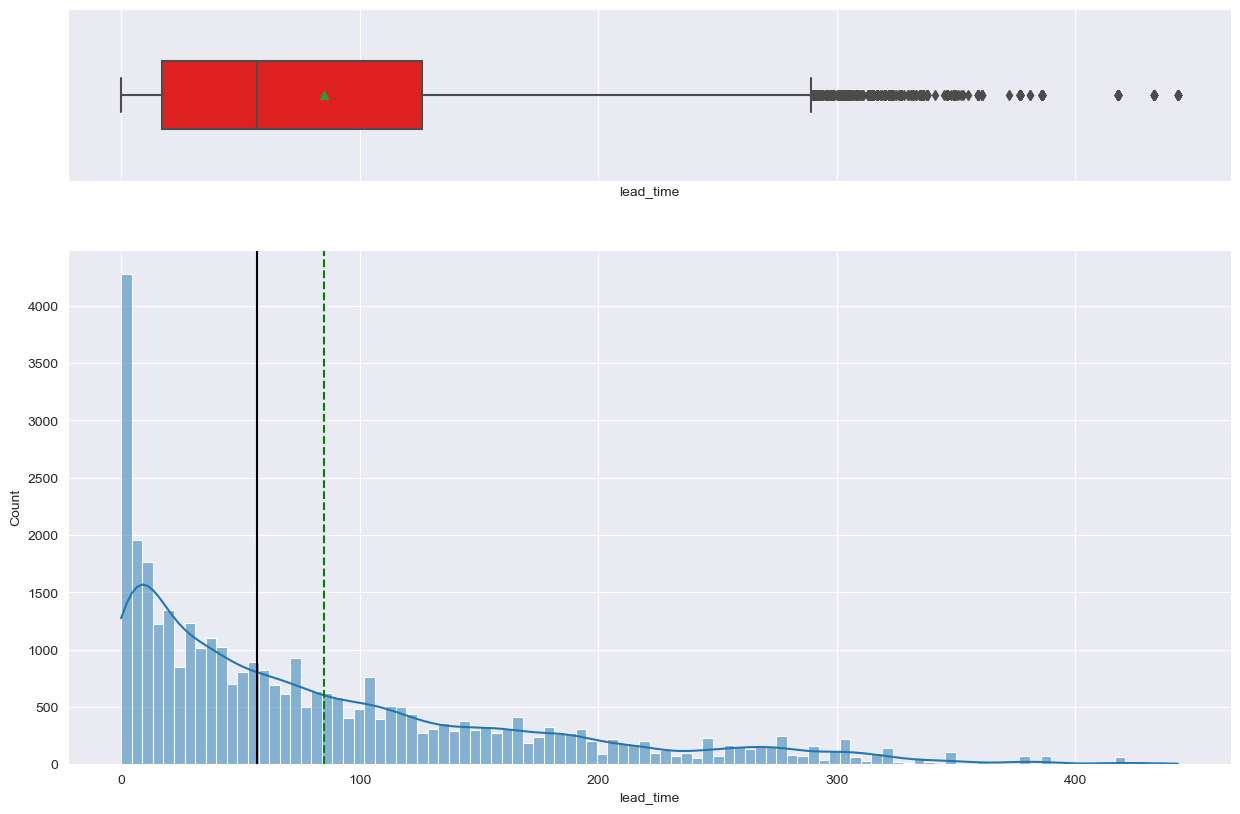

In [318]:
histogram_boxplot(data, 'lead_time', kde=True, bins=100)

- The distribution of lead time is right-skewed, and there are many outliers.
- Some customers made booking around 500 days in advance, but most of the customers made booking around 0-200 days in advance.
- Many customers have made the booking on the same day of arrival as well.

### Observations on average price per room

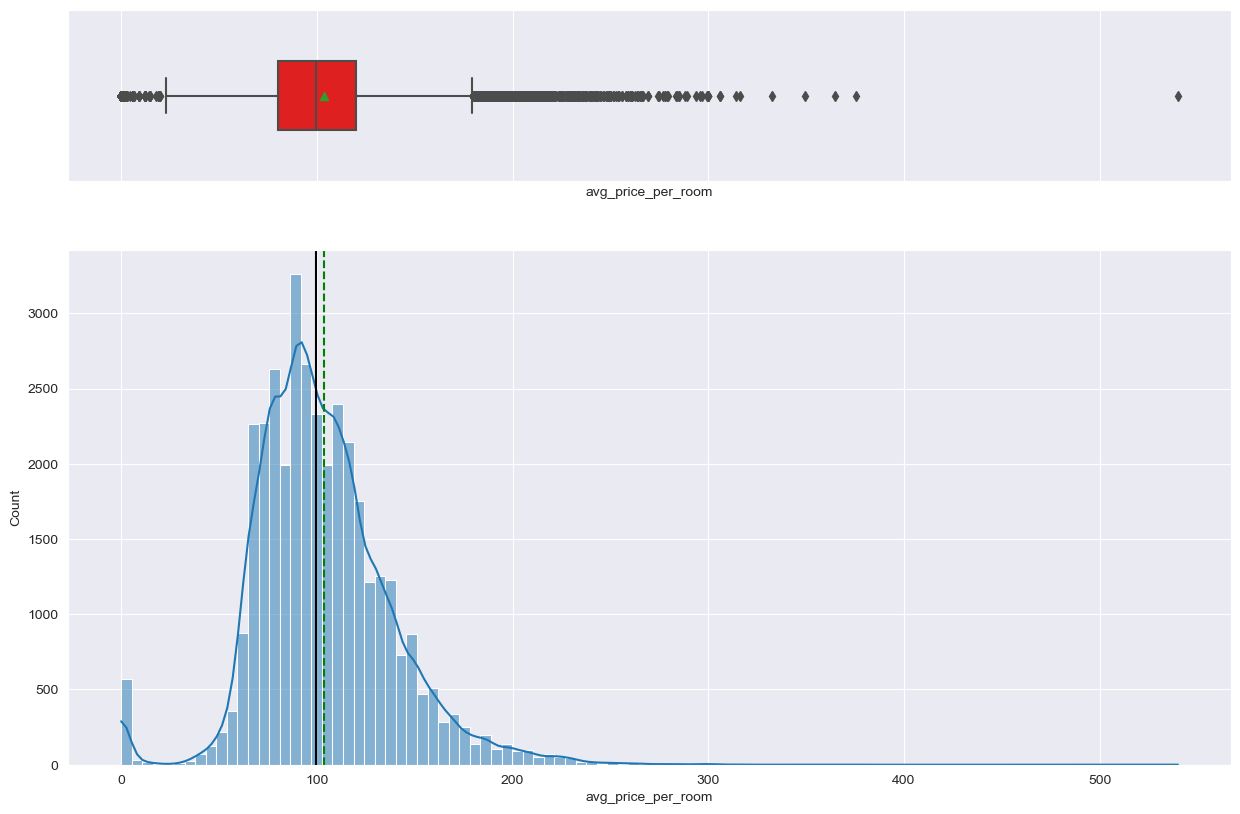

In [319]:
histogram_boxplot(data, 'avg_price_per_room', kde=True, bins=100)

* The distribution of average price per room is skewed to right. There are outliers on both sides.
* The average price of a room is around ~100 Euros.
* There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. 
* Instead of dropping it, we will clip this to the upper whisker (Q3 + 1.5 * IQR).
* Interestingly some rooms have a price equal to 0. Let's check them.

In [320]:
data[data['avg_price_per_room'] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


* There are 545 observations where the average price of the room is 0.
* In the market segment column, it looks like many of the observations are complementary.

In [321]:
data.loc[data['avg_price_per_room'] == 0, 'market_segment_type'].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [322]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [323]:
# assigning the outliers tha value of upper whisker
data.loc[data['avg_price_per_room'] > 500, 'avg_price_per_room'] = Upper_Whisker

### Observations on number of adults

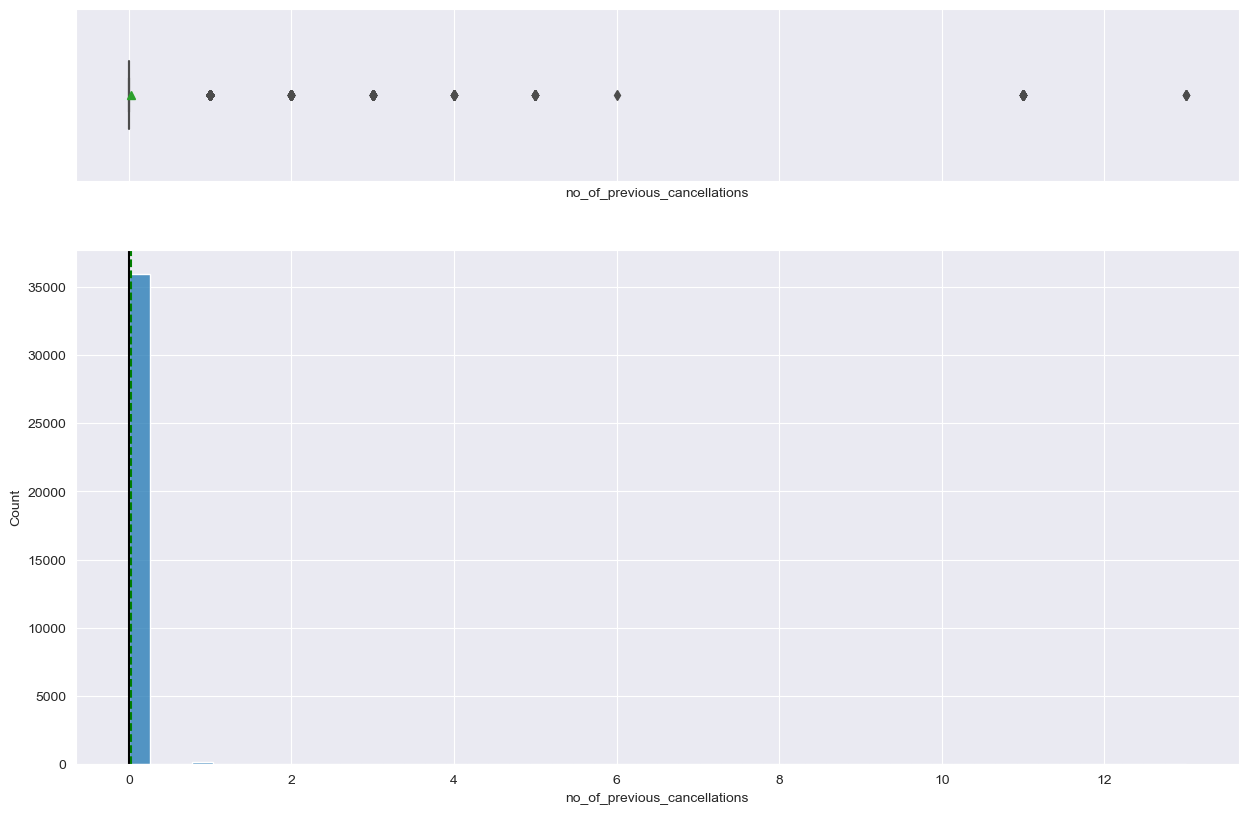

In [324]:
histogram_boxplot(data, 'no_of_previous_cancellations', kde=False)

* Very few customers have more than one cancellation.
* Some customers canceled more than 12 times.

### Observations on number of previous booking not canceled

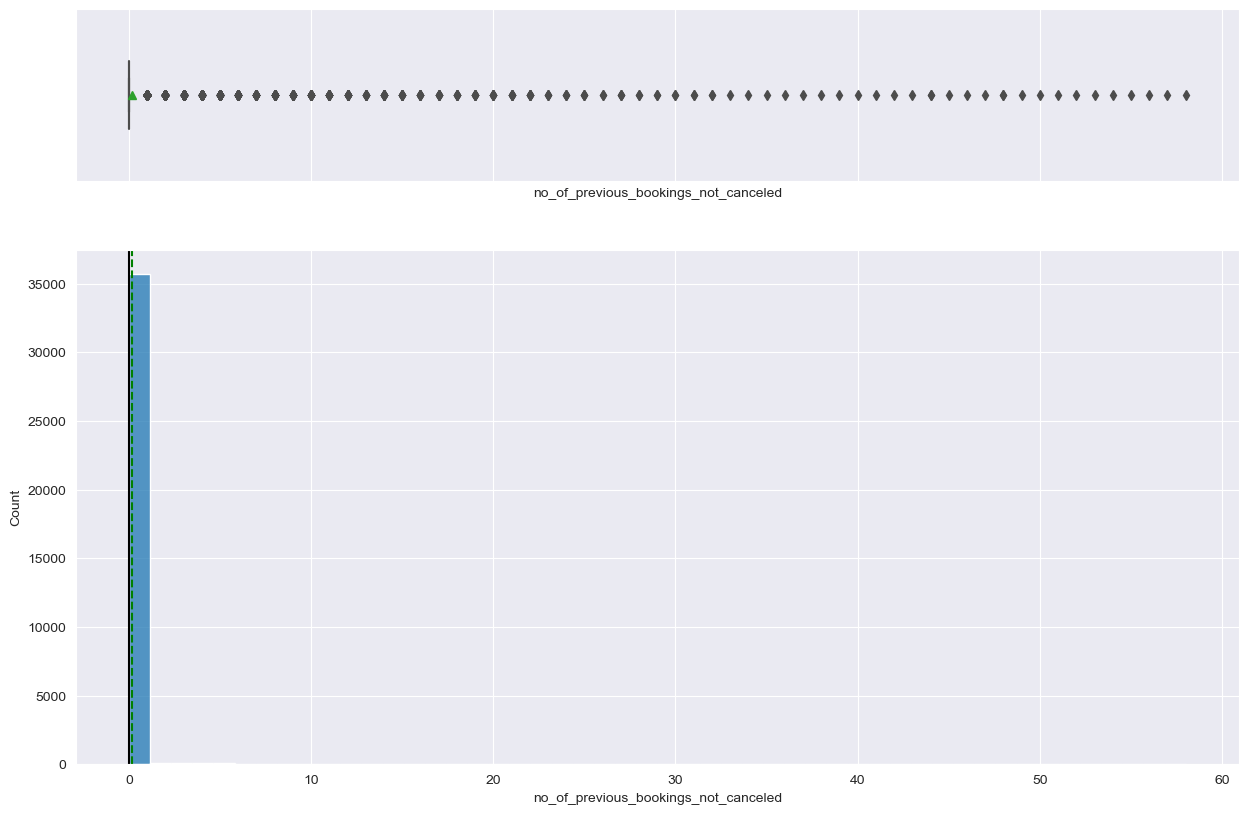

In [325]:
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled', kde=False, bins=50)

* Very few customers have more than 1 booking not canceled previously.
* Some customers have not canceled their bookings around 60 times.

### Observations on number of adults

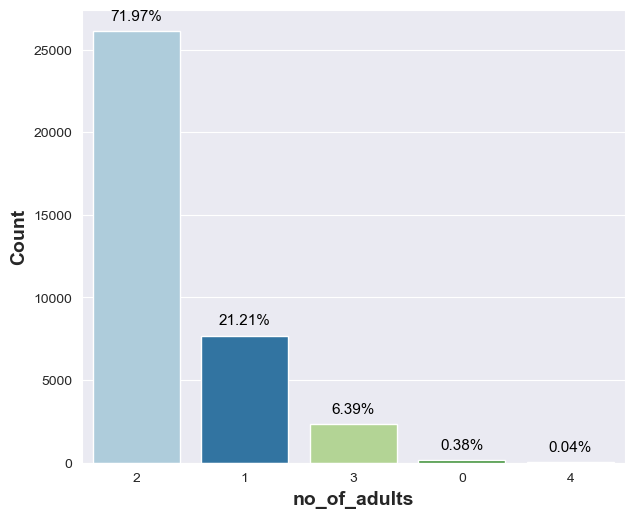

In [326]:
labeled_barplot(data, 'no_of_adults', perc=True)

* 72% of the bookings were made for 2 adults.

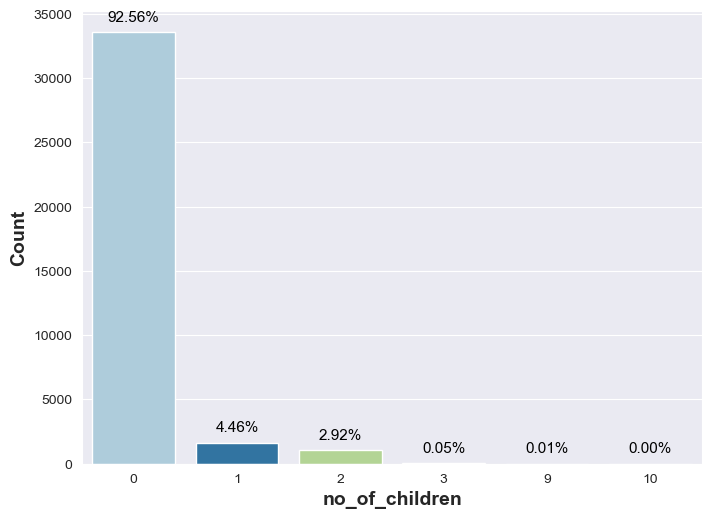

In [327]:
labeled_barplot(data, 'no_of_children', perc=True)

* 92% of the bookings were made for 0 children.
* 6% of the bookings were made for 1 or more child.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [328]:
# replacing the values of number of children greater than 3
data['no_of_children'] = data['no_of_children'].replace([9, 10], 3)

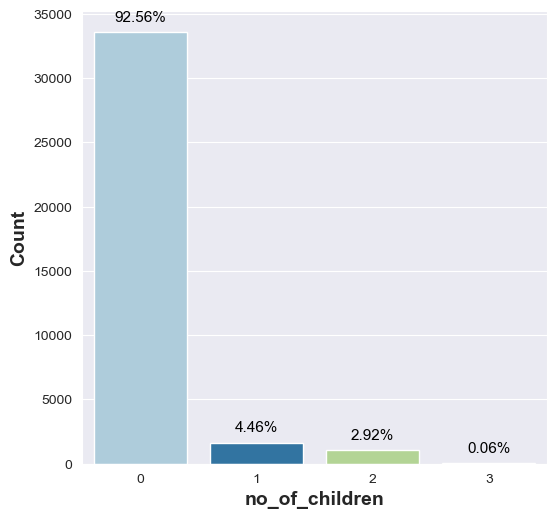

In [329]:
# After replacing the values
labeled_barplot(data, 'no_of_children', perc=True)

### Observations on number of week nights

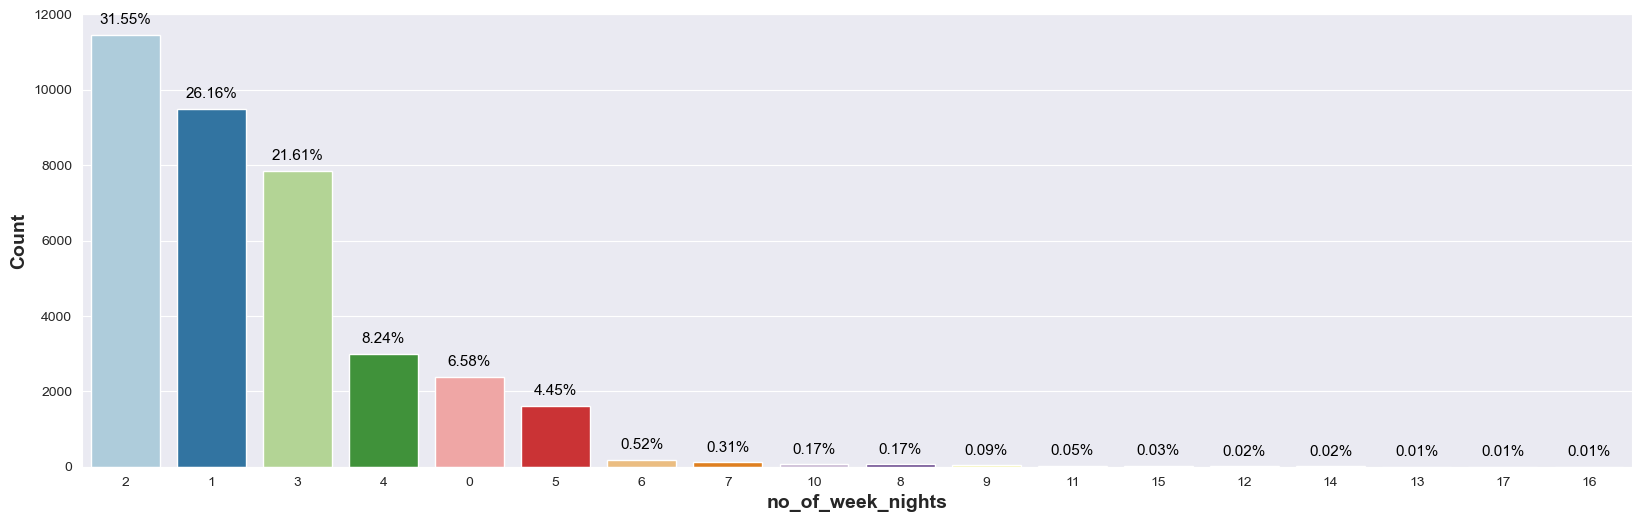

In [330]:
labeled_barplot(data, 'no_of_week_nights', perc=True)

* Most bookings are made for 2 nights (31.5%) followed by 1 night (26.2%).
* A very less proportion of customers made the booking for more than 10 days.

### Observations on number of weekend nights

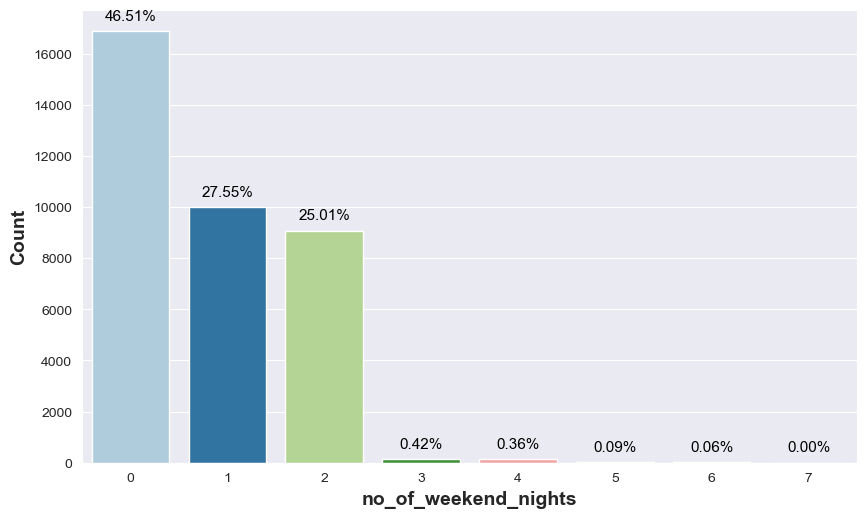

In [331]:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

* 46.5% of the customers do not plan to spend the weekend in the hotel.
* The percentage of customers planning to spend 1 or 2 weekends in the hotel is almost the same.

### Observations on required car parking space

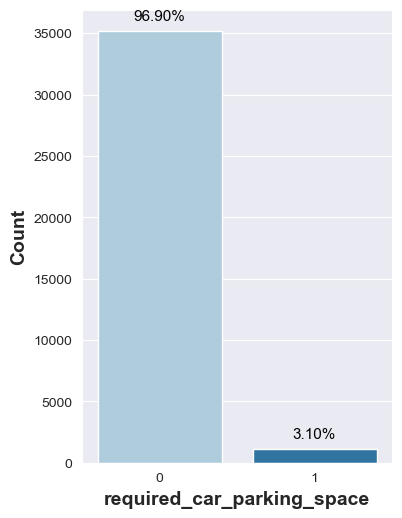

In [332]:
labeled_barplot(data, 'required_car_parking_space', perc=True)

* 96.90% of the customers do not require car parking space.

### Observations on type of meal plan

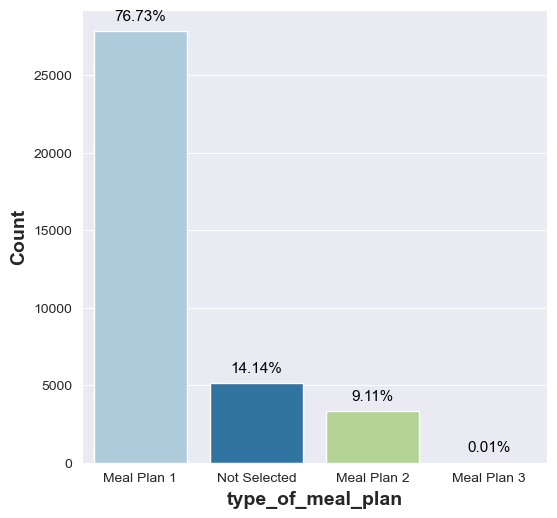

In [333]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

* Most of the customers prefer meal plan 1 that is only breakfast.
* 14.1% of the customers didn't select a meal plan.

### Observations on room type reserved

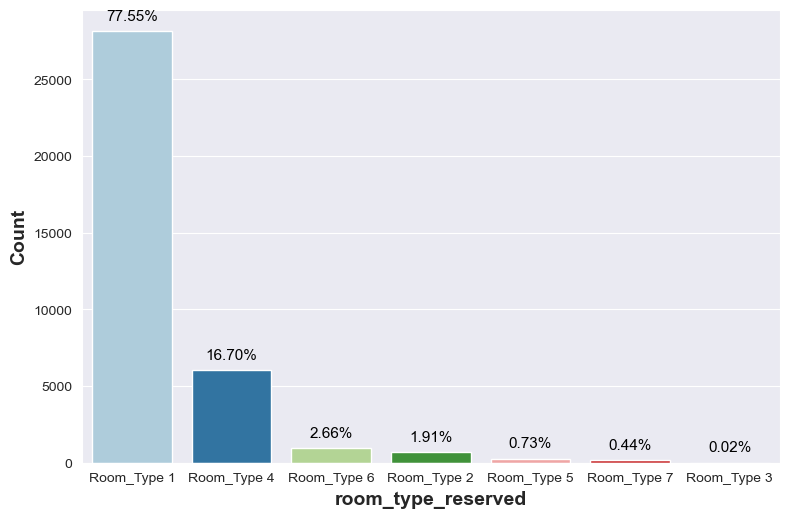

In [334]:
labeled_barplot(data, 'room_type_reserved', perc=True)

* Around 77% of the customers booked Room_Type 1 followed by 17% of the customers booking Room_Type 4.

### Observations on arrival month

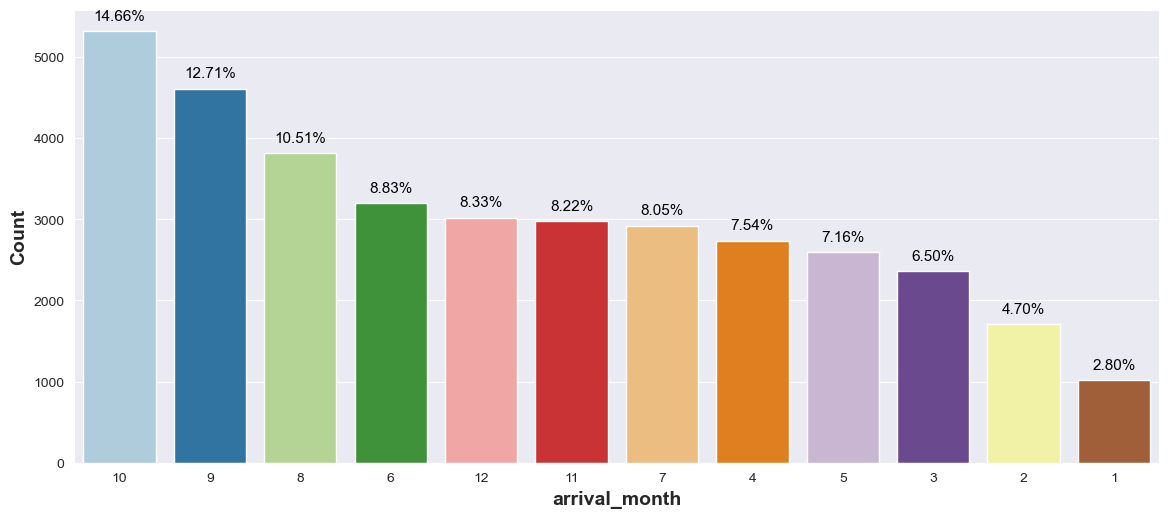

In [335]:
labeled_barplot(data, 'arrival_month', perc=True)

* October is the busiest month for the hotel followed by September.
* 14.7% of the bookings were made in October.

### Observations on market segment type

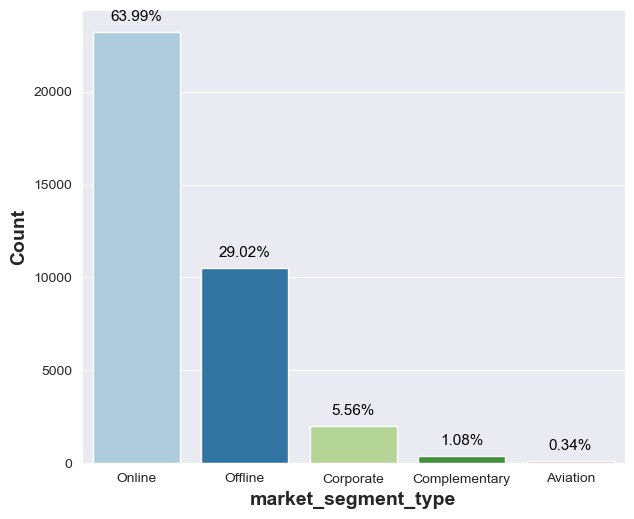

In [336]:
labeled_barplot(data, 'market_segment_type', perc=True)

* 54.5% of the customers generally do not make any requests while booking a hotel room.

### Observations on number of special requests

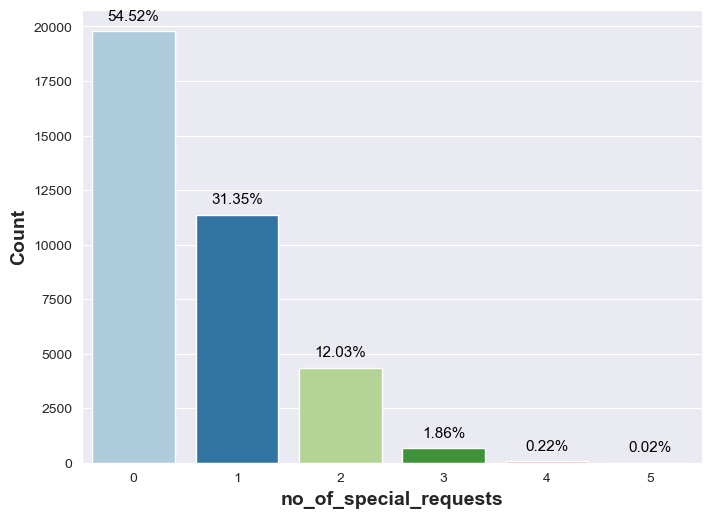

In [337]:
labeled_barplot(data, 'no_of_special_requests', perc=True)

* 54.5% of the customers do not make any special requests.

### Observations on booking status

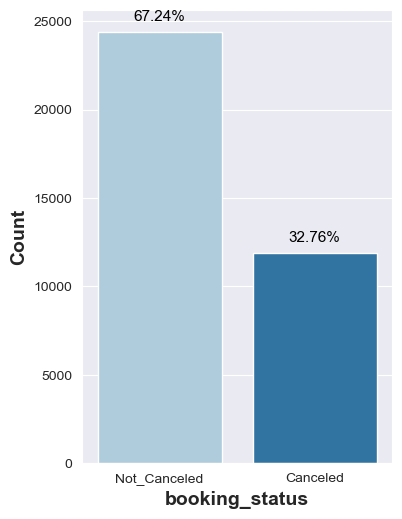

In [338]:
labeled_barplot(data, 'booking_status', perc=True)

* 32.8% of the bookings were canceled by the customers.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [339]:
data['booking_status'] = data['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [340]:
data['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

## Bivariate Analysis

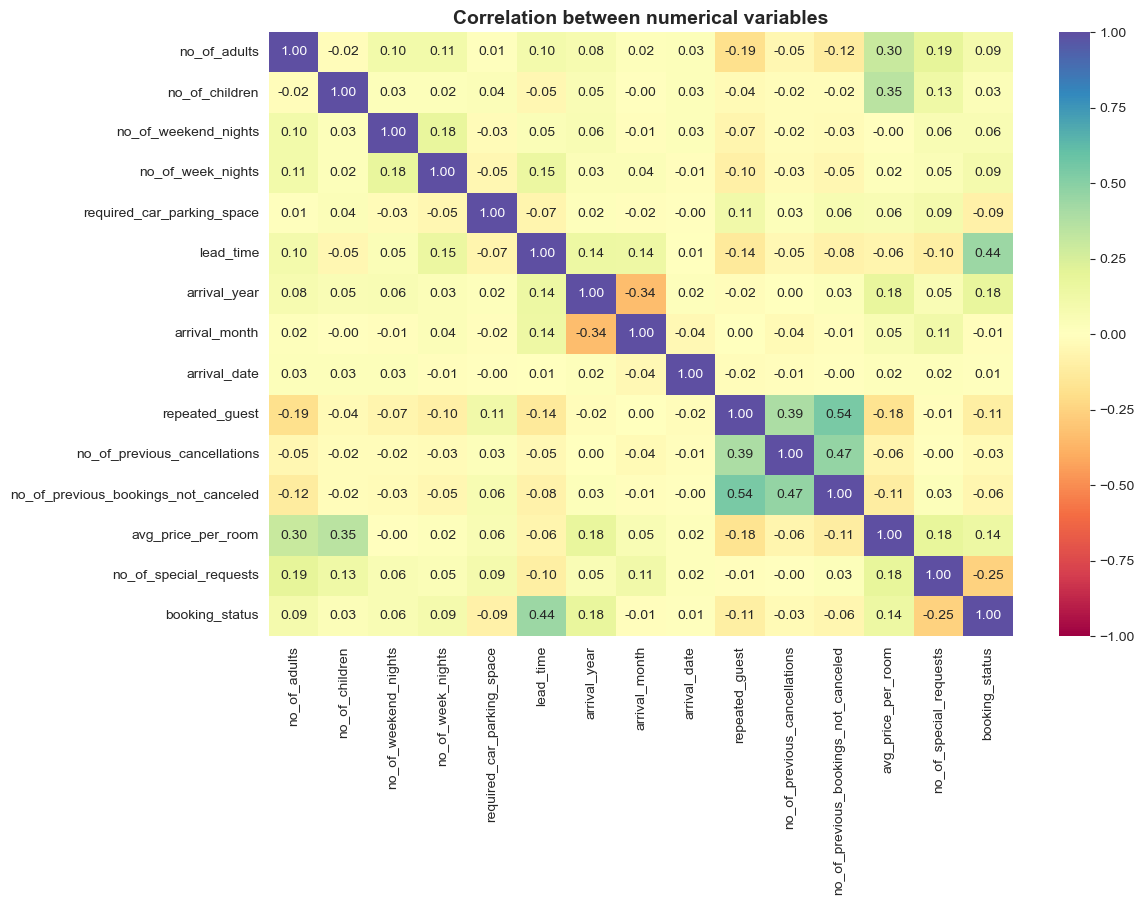

In [341]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 8), dpi=100)

sns.heatmap(data[cols_list].corr(), fmt='.2f', annot=True, cmap='Spectral',
            vmin=-1, vmax=1, )

plt.title('Correlation between numerical variables', fontsize=14, weight='bold')
plt.show()

* There's a positive correlation between the number of customers (adults and children) and the average price per room.
* This makes sense as more the number of customers more rooms they will require thus increasing the cost.
* There's a negative correlation between average room price and repeated guests. The hotel might be giving some loyalty benefits to the customers.
* There's a positive correlation between the number of previous bookings canceled and previous bookings not canceled by a customer and repeated guest. 
* There's a positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a positive correlation between booking status and lead time, indicating higher the lead time higher are the chances of cancellation. We will analyze it further.
* There's a negative correlation between the number of special requests from the customer and the booking status, indicating if a customer has made some special requests the chances of cancellation might decrease. We will analyze it further.

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

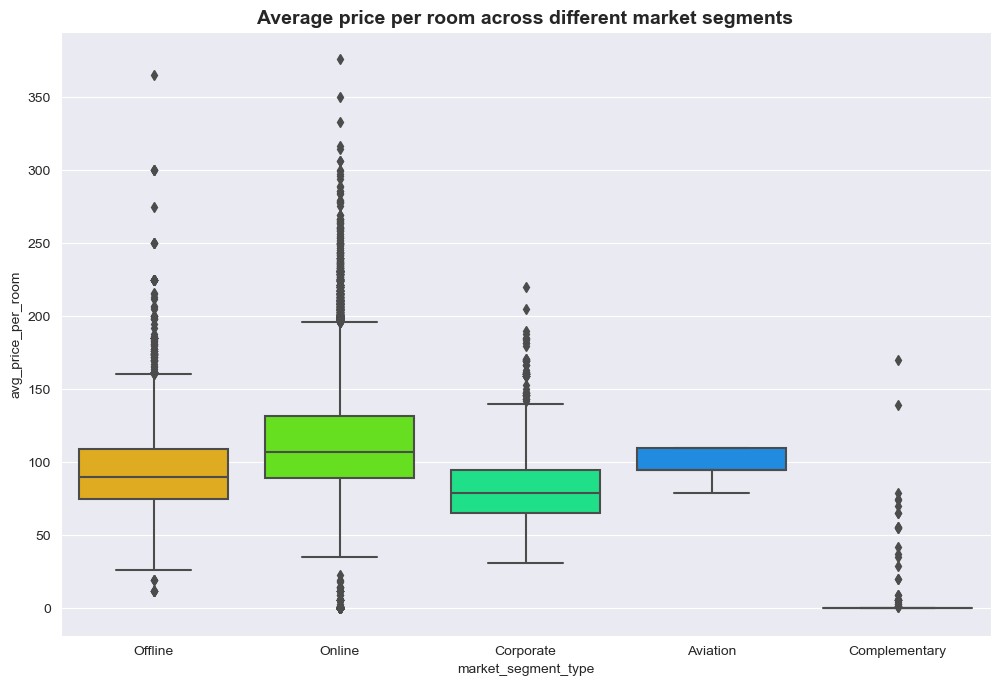

In [342]:
plt.figure(figsize=(12, 8), dpi=100)

sns.boxplot(data=data,
            x='market_segment_type',
            y='avg_price_per_room',
            palette='gist_rainbow')

plt.title('Average price per room across different market segments', fontsize=14, weight='bold')
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------


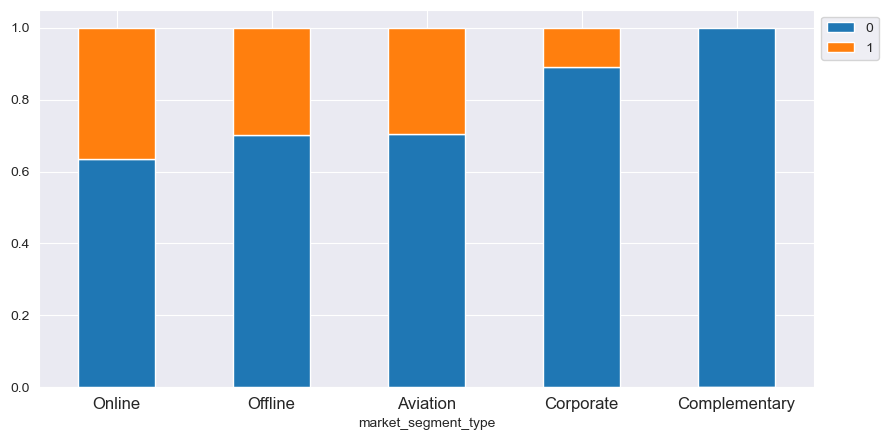

In [343]:
stacked_barplot(data, 'market_segment_type', 'booking_status')

* Around 40% of the online booking were canceled.
* Bookings made offline are less prone to cancellations.
* Corporate segment shows very low cancellations.

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------


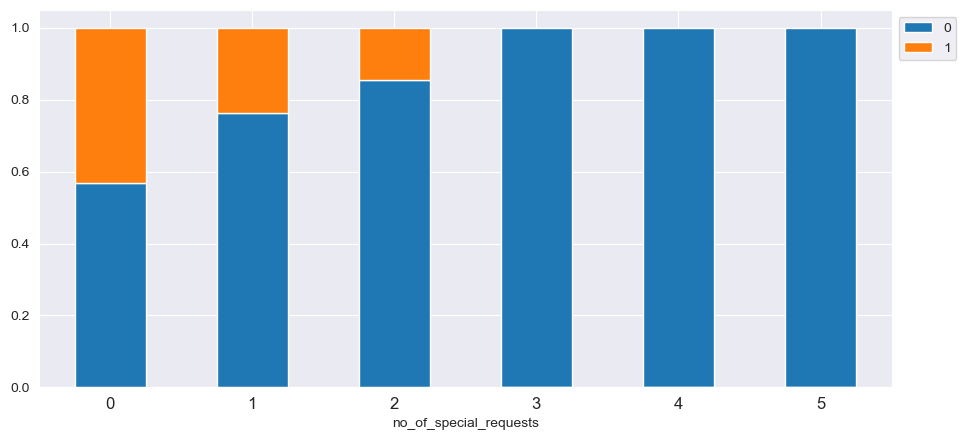

In [344]:
stacked_barplot(data, 'no_of_special_requests', 'booking_status')

* If a customer has made more than 2 requests there's a very high chance that the booking will not be canceled.

**Let's see if the special requets made by the customer impacts the price per room**

Text(0.5, 1.0, 'Average price per room across different number of special requests')

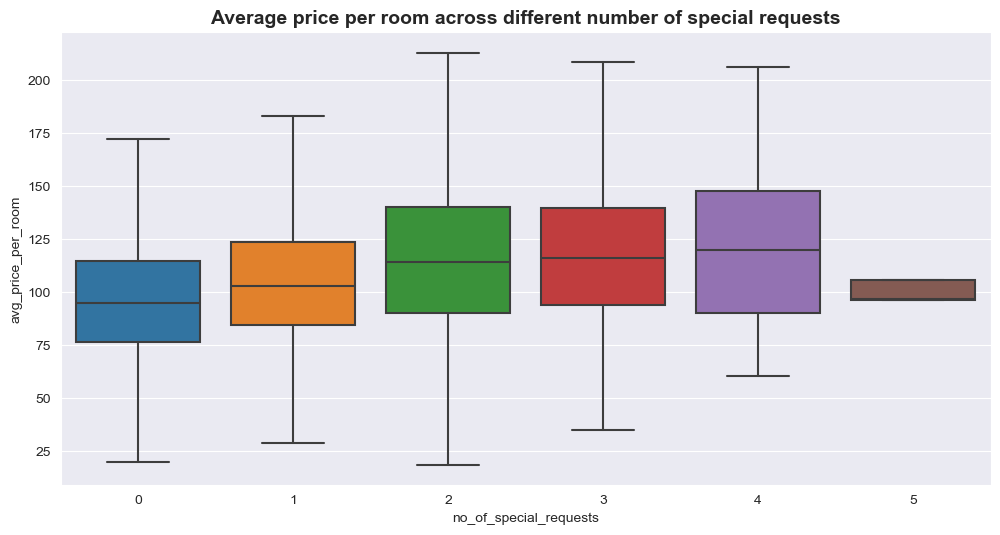

In [345]:
plt.figure(figsize=(12, 6), dpi=100)

sns.boxplot(data=data,
            x='no_of_special_requests',
            y='avg_price_per_room',
            showfliers=False  # removing outliers
            )

plt.title('Average price per room across different number of special requests', fontsize=14, weight='bold')

* The median prices of the rooms where some special requests were made by the customers are slightly higher than the rooms where customer didn't make any requests.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

In [346]:
data['booking_status'].unique()

array([0, 1])

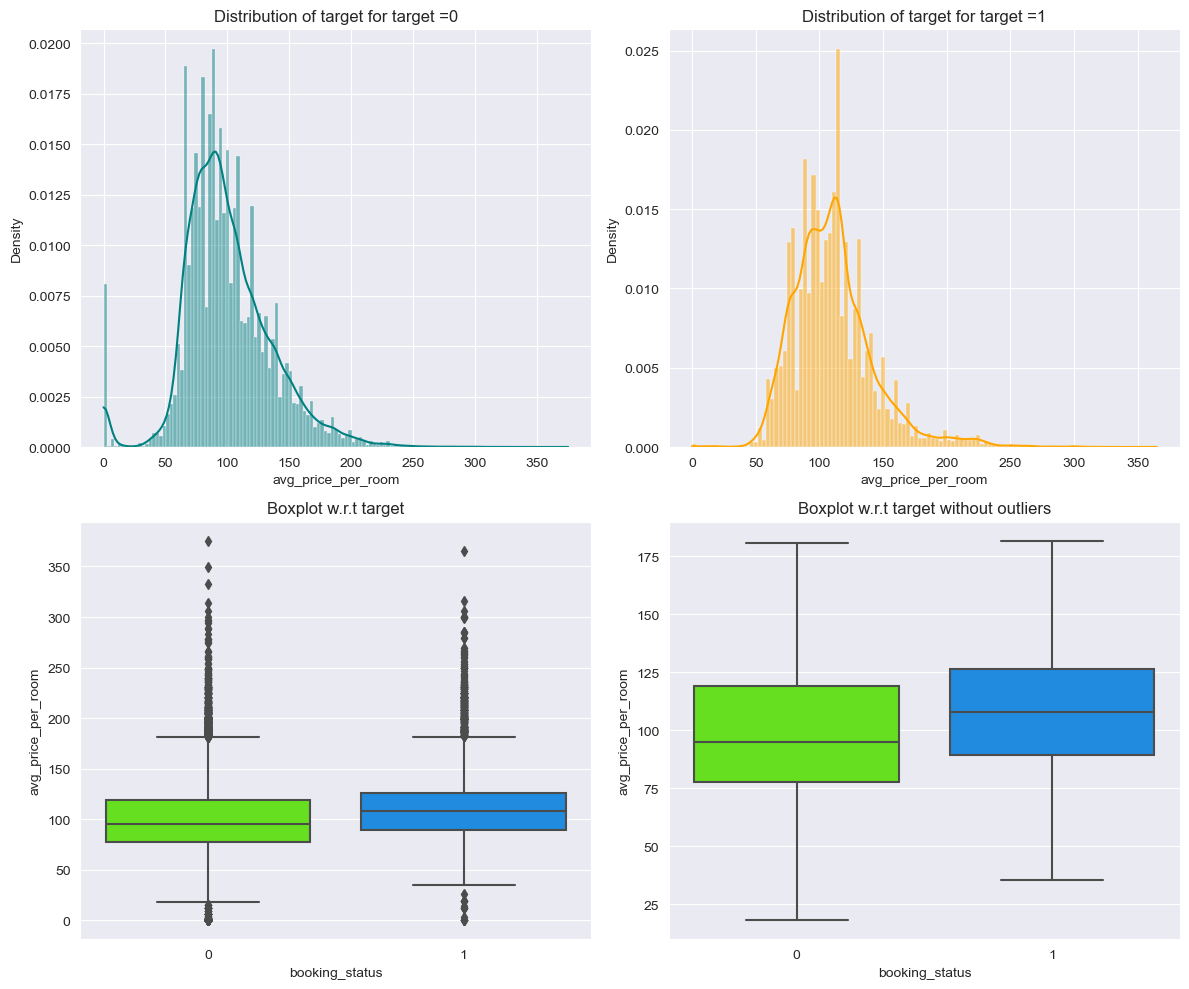

In [347]:
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

* The distribution of price for canceled bookings and not canceled bookings is quite similar.
* The prices for the canceled bookings are slightly higher than the bookings which were not canceled.

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

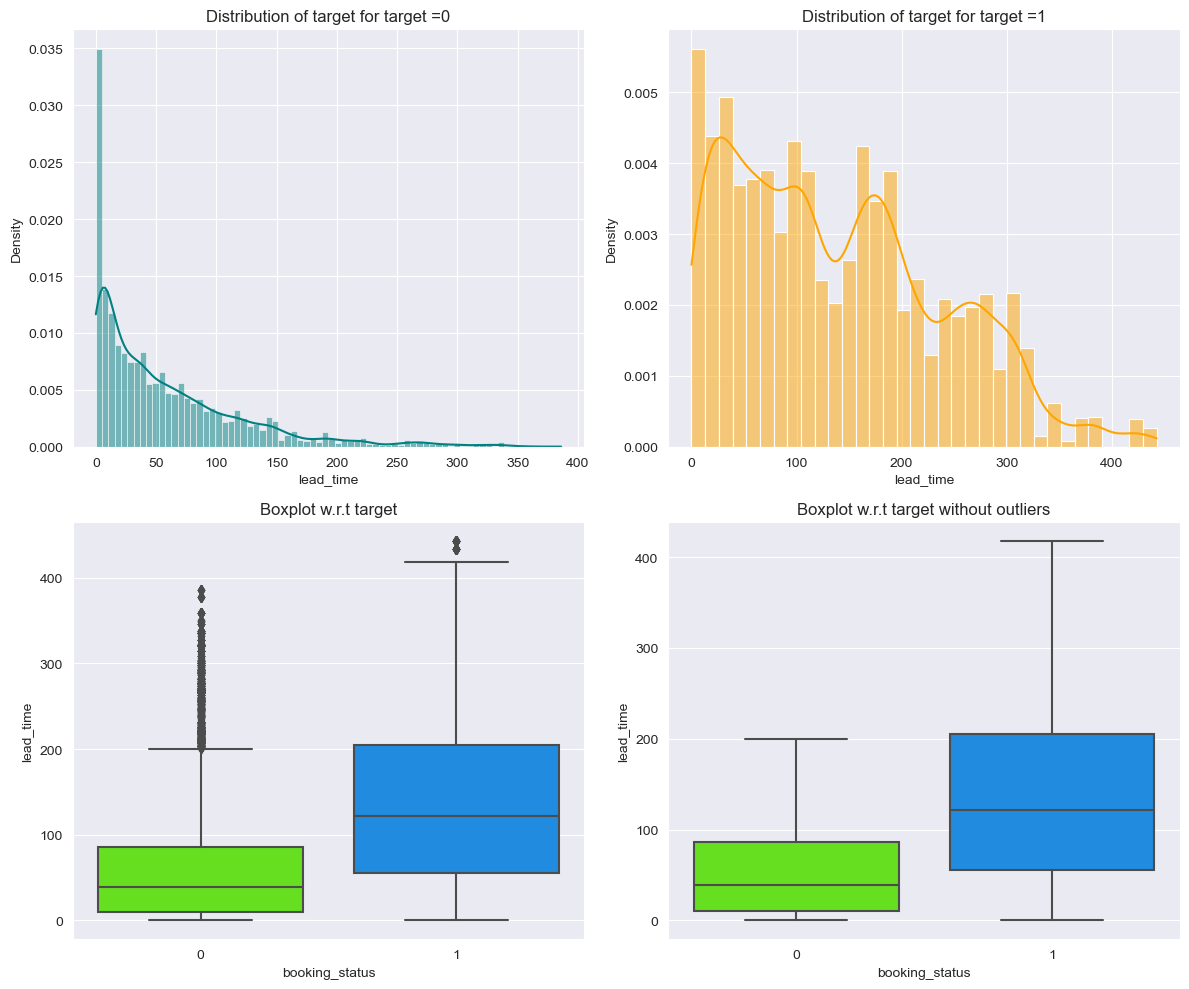

In [348]:
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled.
* Higher the lead time higher are the chances of a booking being canceled.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [349]:
# creating a new dataframe of the customers who traveled with their families
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]

family_data.shape

(28441, 18)

In [350]:
# creating a new column for the number of family members
family_data["no_of_family_members"] = (
        family_data["no_of_adults"] + family_data["no_of_children"]
)

family_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_family_members
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,2
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,2
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,1,2


booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------


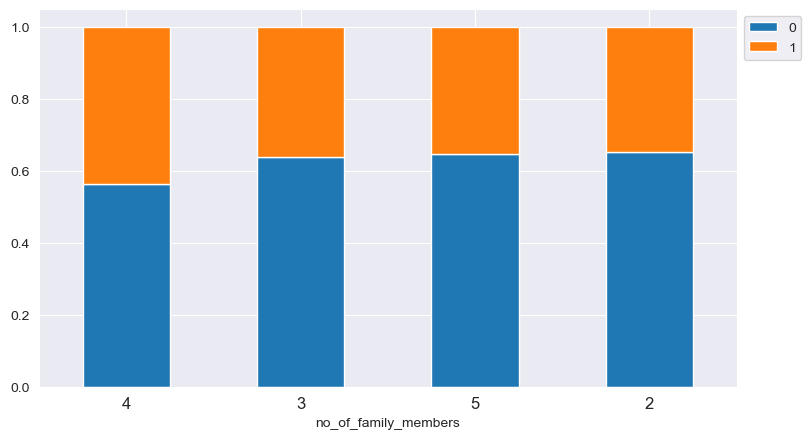

In [351]:
stacked_barplot(family_data, 'no_of_family_members', 'booking_status')

* There's a ~40% chance of a booking getting canceled if the booking is made for 4 family members.

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [352]:
stay_data = data[(data['no_of_week_nights'] > 0) & (data['no_of_weekend_nights'] > 0)]
stay_data.shape

(17094, 18)

In [353]:
stay_data['total_days'] = (
        stay_data['no_of_week_nights'] + stay_data['no_of_weekend_nights']
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------


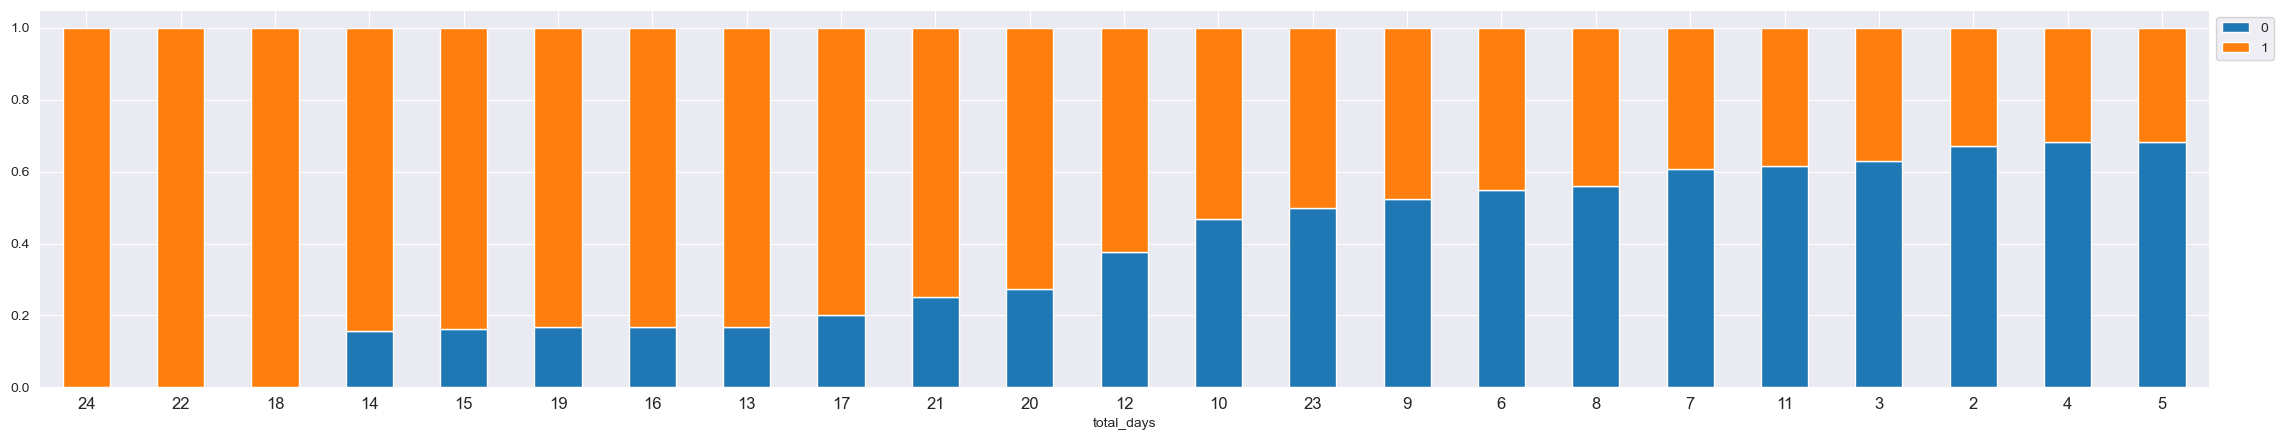

In [354]:
stacked_barplot(stay_data, 'total_days', 'booking_status')

* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------


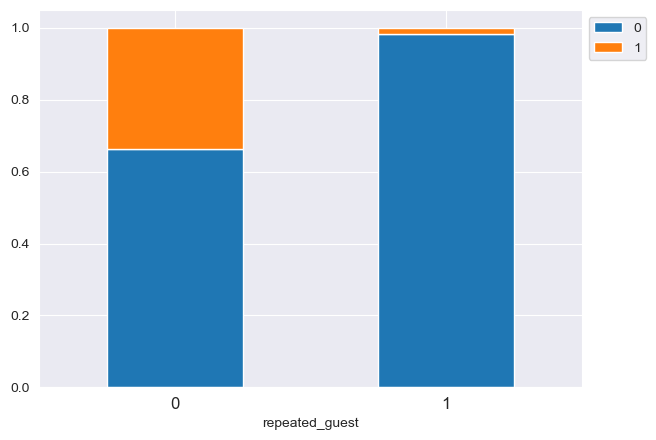

In [355]:
stacked_barplot(data, 'repeated_guest', 'booking_status')

* There are very few repeat customers but the cancellation among them is very less.
* This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.
* A loyal guest is usually more profitable for the business because they are more familiar with what is on offer at a hotel they have visited before.
* Attracting new customers is tedious and costs more as compared to a repeated guest.

**Let's find out what are the busiest months in the hotel.**

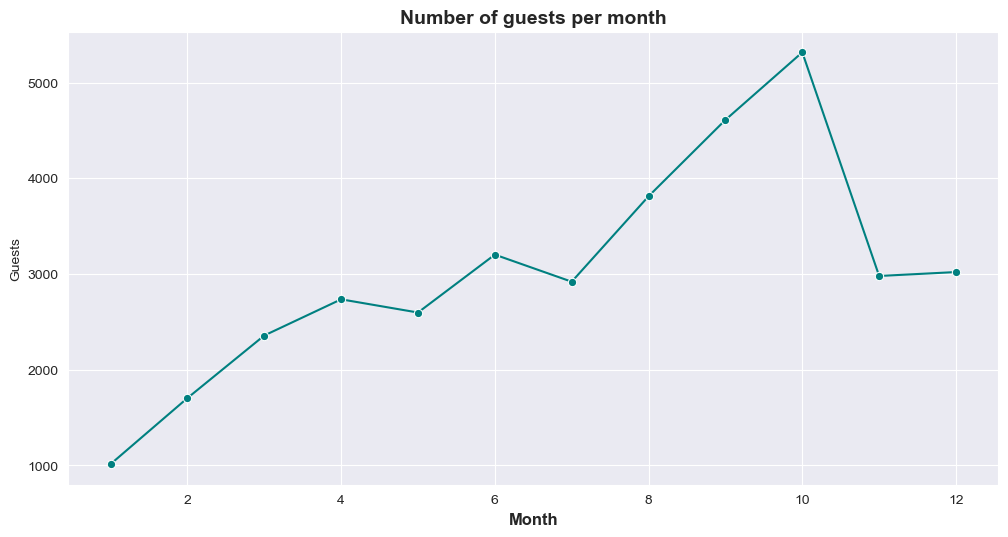

In [356]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby('arrival_month')['arrival_month'].count().sort_values(ascending=False)

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {'Month': list(monthly_data.index),
     'Guests': list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(12, 6), dpi=100)
sns.lineplot(data=monthly_data, x='Month', y='Guests', marker='o', color='teal')

plt.title('Number of guests per month', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12, weight='bold')

plt.show()

* The trend shows the number of bookings remains consistent from April to July and the hotel sees around 3000 to 3500 guests.
* Most bookings were made in October - more than 5000 bookings. 
* Least bookings were made in January - around 1000 bookings.

**Let's check the perentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------


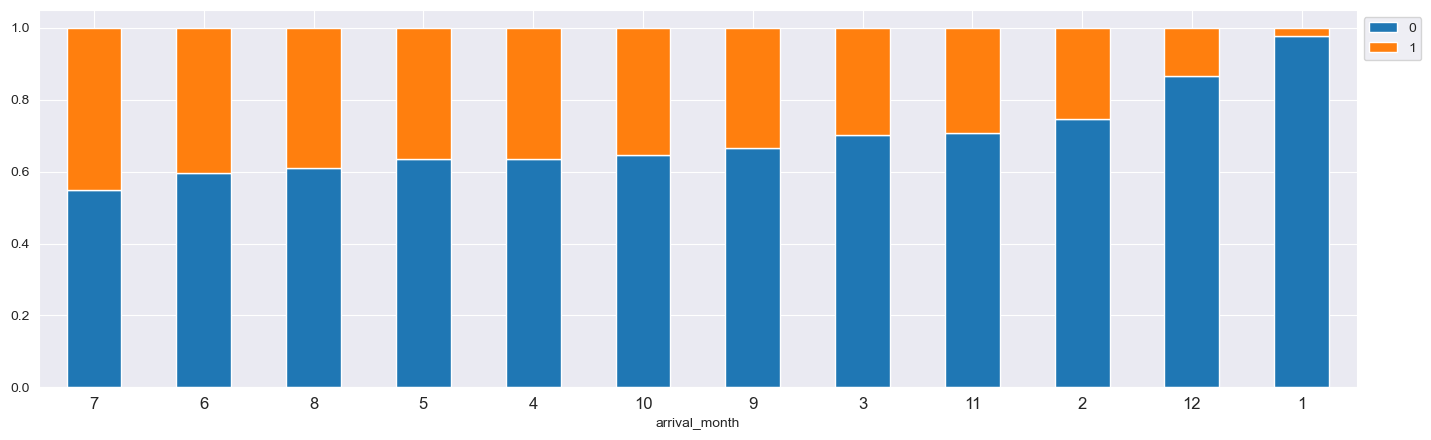

In [357]:
stacked_barplot(data, 'arrival_month', 'booking_status')

* We see that even though the highest number of bookings were made in September and October - around 40% of these bookings got canceled.
* Least bookings were canceled in December and January - customers might have traveled to celebrate Christmas and New Year.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

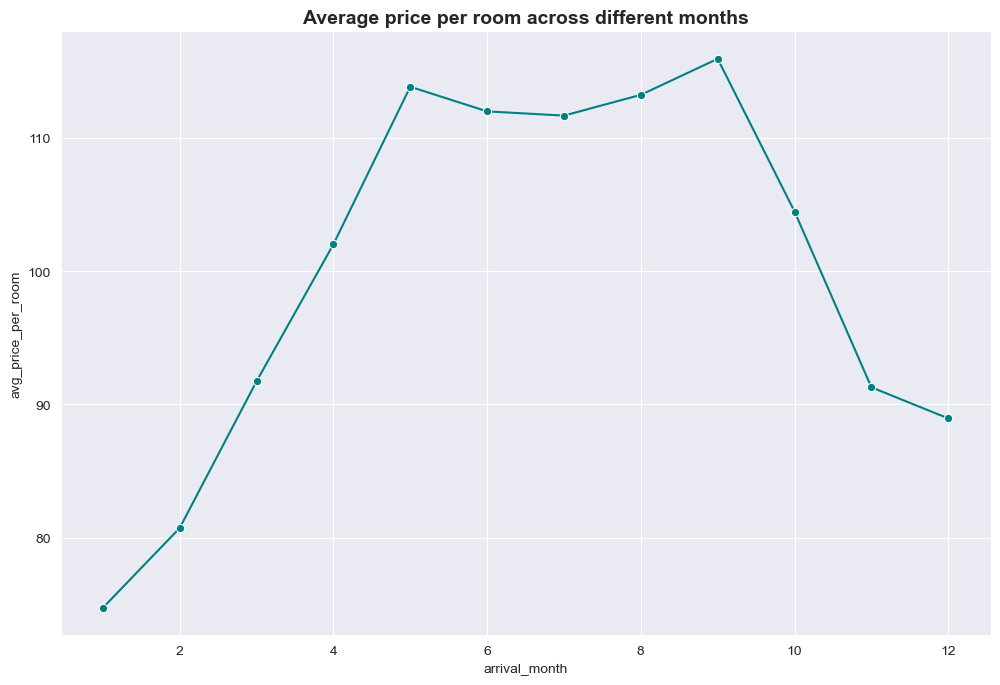

In [369]:
plt.figure(figsize=(12, 8), dpi=100)

sns.lineplot(data=data, x='arrival_month', y='avg_price_per_room', marker='o', color='teal', ci=None)

plt.title('Average price per room across different months', fontsize=14, weight='bold')

plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the numerical columns.

In [371]:
# outlier detection using boxplot
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year column
numerical_cols.remove('booking_status')

numerical_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

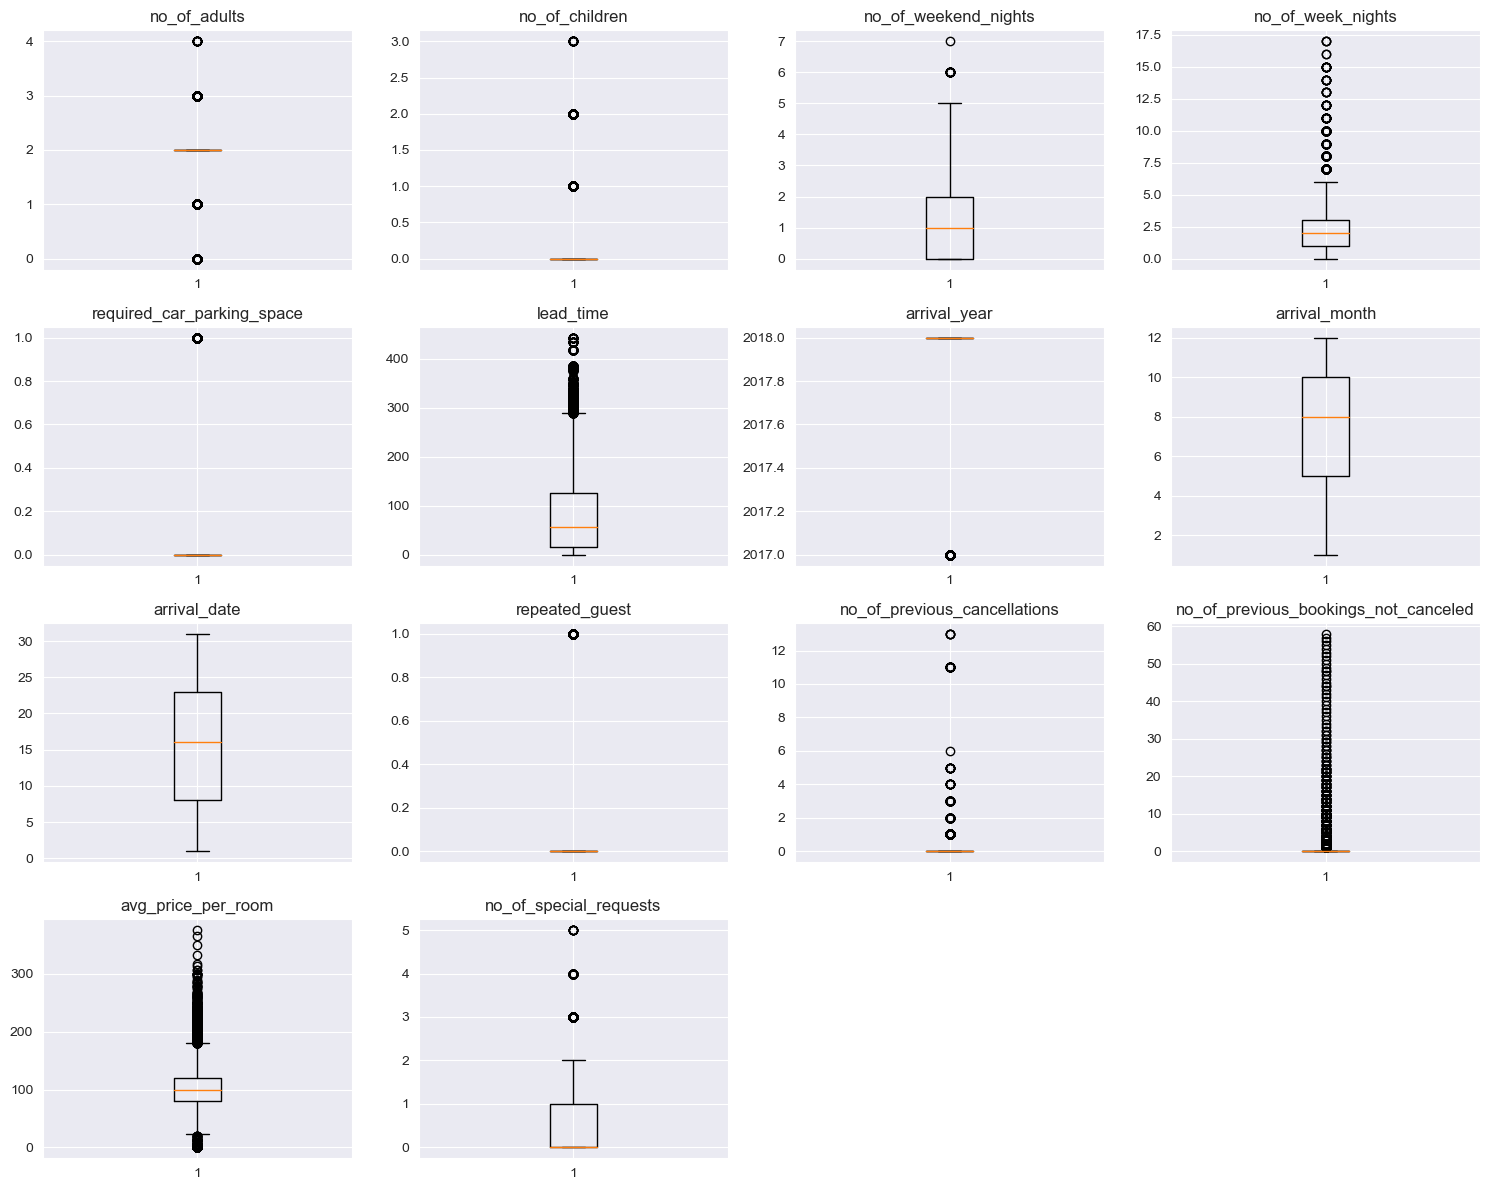

In [377]:
plt.figure(figsize=(15, 12), dpi=100)

for i, variable in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

## Model Building

## Logistic Regression

### Data Preparation for Logistic Regression

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [380]:
data_X = data.drop(['booking_status'], axis=1)
data_y = data['booking_status']

X = sm.add_constant(data_X)
y = pd.get_dummies(data_y, drop_first=True)

X

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,1.0,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1.0,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,1.0,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,1.0,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.0,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,1.0,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,1.0,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,1.0,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0
